In [3]:
import sys
sys.path.insert(0,'../')
import os
#run on cpu to not interfere with trianing
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from net.hourglass import HourglassNet
from eval.heatmap_process import post_process_heatmap
import glob
import cv2
import matplotlib.pyplot as plt
import scipy
import imageio
from top.demo import render_joints
import numpy as np



In [7]:
num_class=14
num_stack=2
model_dir="../../trained_models//MPII_original_100"
model_json="net_arch.json"
epoch=99
model_weights="weights_epoch"+str(epoch)+".h5"
inres=(256, 256)
outres=(64,64)
xnet = HourglassNet(num_class, num_stack, inres, outres)
model_json=os.path.join(model_dir, model_json)
model_weights=os.path.join(model_dir, model_weights)

xnet.load_model(model_json, model_weights)

def normalize(imgdata, color_mean):
    '''
    :param imgdata: image in 0 ~ 255
    :return:  image from 0.0 to 1.0
    '''
    imgdata = imgdata/255.0

    for i in range(imgdata.shape[-1]):
        imgdata[:, :, i] -= color_mean[i]

    return imgdata

def inference_rgb(net, rgbdata, orgshape, mean=None):

    scale = (orgshape[0] * 1.0 / inres[0], orgshape[1] * 1.0 / inres[1])
    img_scale = iaa.Scale({"height": inres[0], "width": inres[1]})

    img_data = img_scale.augment_image(rgb_data)

    mean = np.array([0.4404, 0.4440, 0.4327], dtype=np.float)

    imgdata = normalize(imgdata, mean)

    input = imgdata[np.newaxis, :, :, :]

    out = net.model.predict(input)
    return out[-1], scale

def inference_file(imgfile, net):
    imgdata = imageio.imread(imgfile)
    ret = inference_rgb(net,imgdata, imgdata.shape)
    return ret

000033016.jpg


/media/sda4/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


124.72486183449074
56.73201915317223
(720, 1280, 3)
0.0012363044


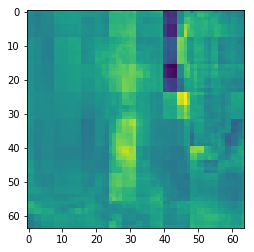

0.00092433


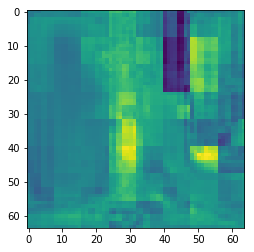

0.0011518825


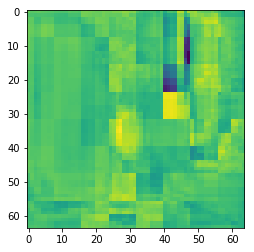

-6.8878275e-05


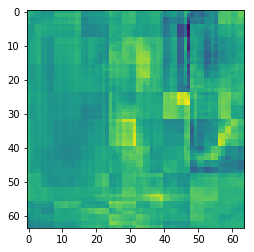

0.0014312827


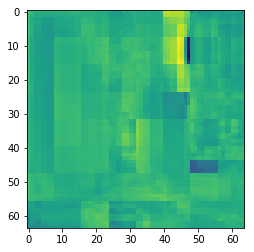

0.0005792106


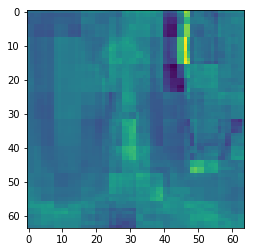

0.00040126138


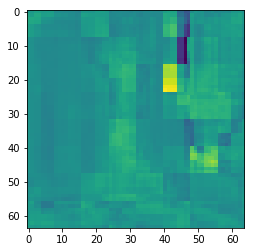

0.00019833673


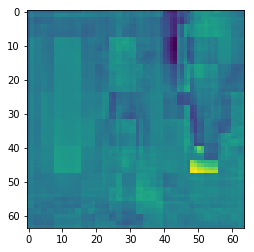

0.0006607979


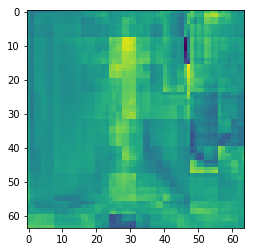

0.0006716433


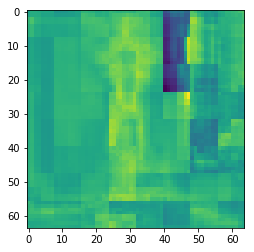

0.0013276201


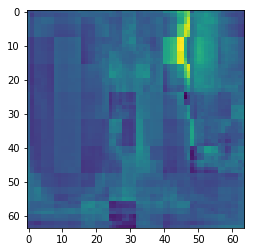

0.00054523477


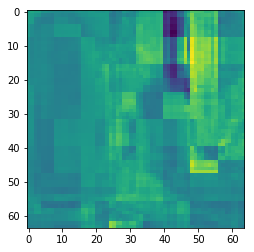

0.0012736451


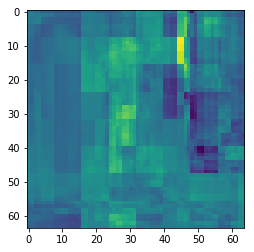

0.0014531844


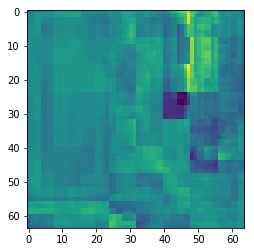

0.0017190804


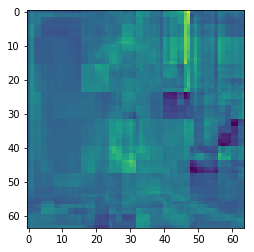

0.0014382772


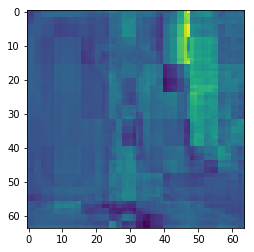

[(920.0, 281.25, 0.019466035), (1040.0, 472.5, 0.0179625), (540.0, 393.75, 0.012913058), (920.0, 292.5, 0.012500127), (880.0, 157.5, 0.021233508), (920.0, 101.25, 0.02198782), (820.0, 247.5, 0.02530542), (980.0, 517.5, 0.022999017), (580.0, 101.25, 0.013731017), (940.0, 281.25, 0.01695235), (880.0, 112.5, 0.026195066), (960.0, 168.75, 0.015116466), (900.0, 101.25, 0.018165313), (940.0, 191.25, 0.017274247), (940.0, 0.0, 0.019716715), (940.0, 56.25, 0.025607552)]


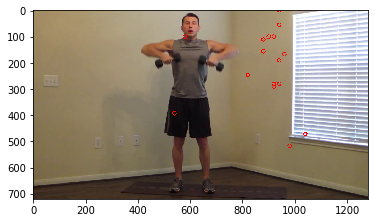

yoga2.jpg
225.56774039498413
68.86386516674897
(349, 620, 3)
0.0026329672


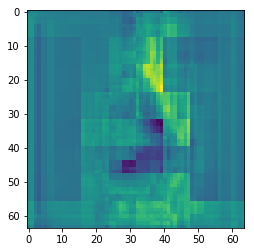

0.0021690214


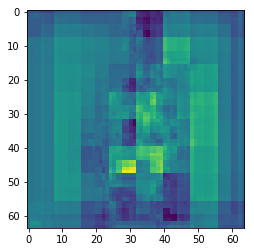

-0.0010138922


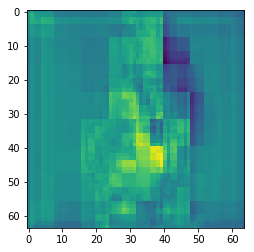

-0.0030240878


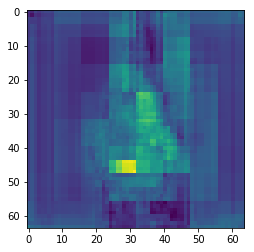

-0.0011675814


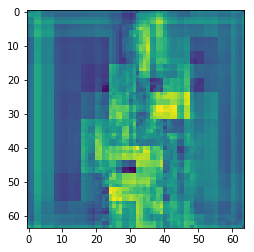

-0.0017458757


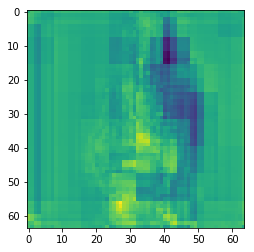

-0.0020293207


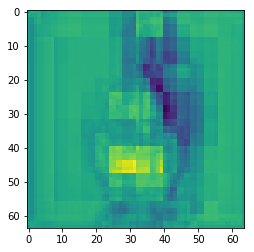

0.0016026525


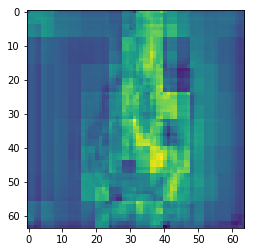

0.0014791832


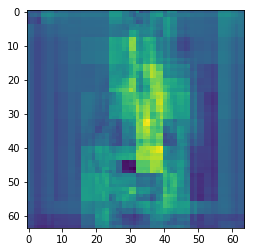

0.00060501497


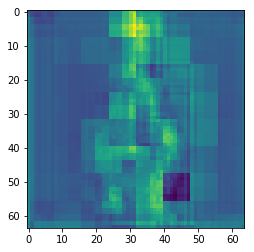

0.0027492535


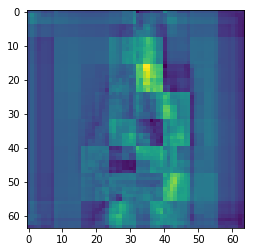

0.0021660584


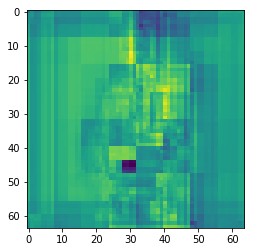

-0.00046118346


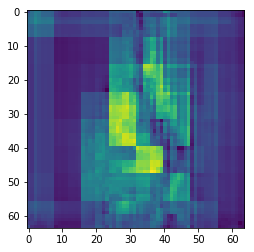

0.003027512


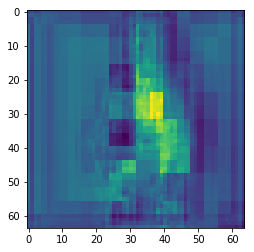

0.0008704337


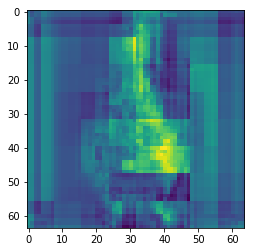

0.0032473106


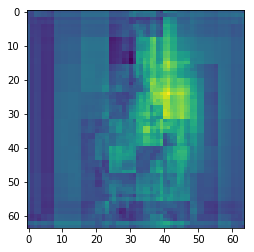

[(377.8125, 119.96875, 0.025927957), (290.625, 250.84375, 0.020720191), (377.8125, 234.484375, 0.02267456), (290.625, 245.390625, 0.026719505), (377.8125, 158.140625, 0.009919913), (261.5625, 305.375, 0.0133517105), (300.3125, 245.390625, 0.016847426), (377.8125, 234.484375, 0.018484471), (339.0625, 174.5, 0.025964044), (300.3125, 21.8125, 0.028389923), (339.0625, 92.703125, 0.023982415), (290.625, 65.4375, 0.015661892), (348.75, 250.84375, 0.023210902), (368.125, 163.59375, 0.028906522), (387.5, 218.125, 0.01993389), (397.1875, 130.875, 0.025150882)]


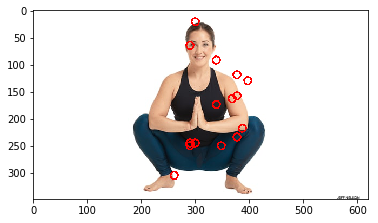

im00001.jpg
93.01106056010515
57.80098490534725
(105, 157, 3)
0.0017224348


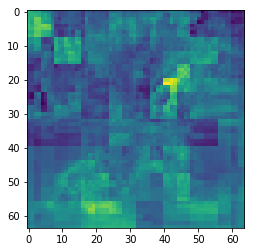

0.00088916044


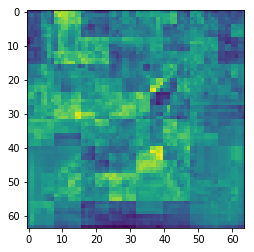

0.0020942623


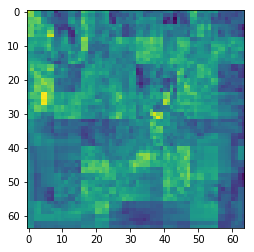

0.0016259092


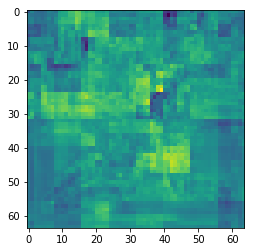

0.0014817344


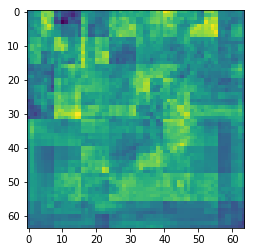

0.0003322211


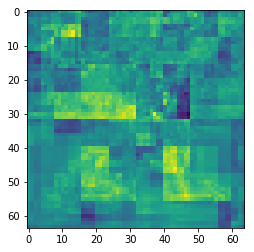

0.001305206


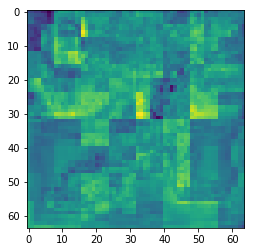

0.0010507373


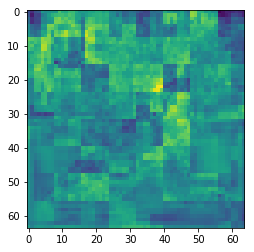

0.0032568625


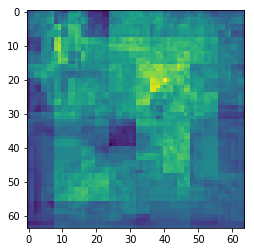

0.002210286


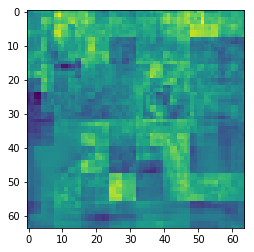

0.0020729185


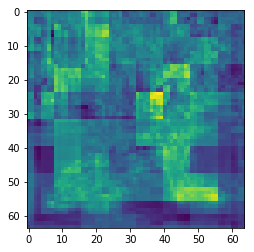

0.0023495546


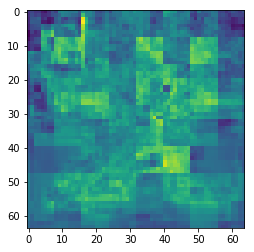

0.0020997762


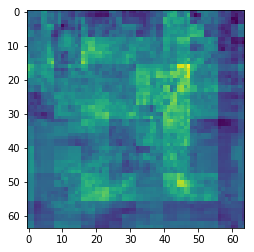

0.0020194668


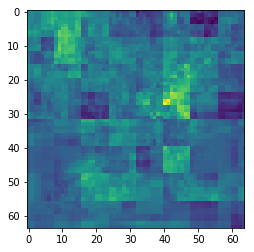

0.0014458504


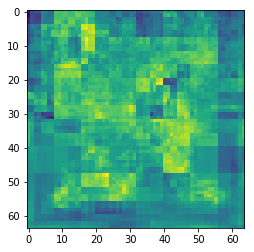

0.0015080031


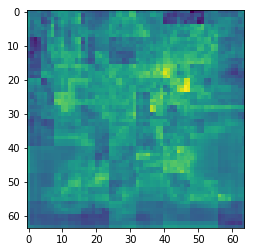

[(100.578125, 34.453125, 0.012836764), (93.21875, 68.90625, 0.0075171907), (12.265625, 41.015625, 0.009827556), (103.03125, 72.1875, 0.008525055), (34.34375, 49.21875, 0.009011057), (105.484375, 75.46875, 0.0072557386), (80.953125, 49.21875, 0.009339985), (93.21875, 36.09375, 0.00854072), (90.765625, 36.09375, 0.013658157), (125.109375, 4.921875, 0.010530435), (93.21875, 41.015625, 0.010595673), (98.125, 72.1875, 0.009142317), (115.296875, 26.25, 0.011371211), (100.578125, 42.65625, 0.012587867), (41.703125, 13.125, 0.008538414), (112.84375, 36.09375, 0.010913284)]


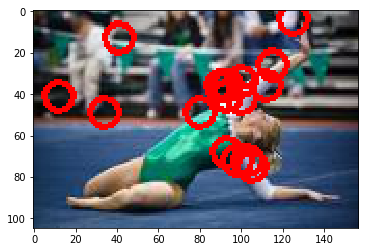

yoga1.jpg
223.3097242455775
67.61428026223514
(620, 620, 3)
0.002671113


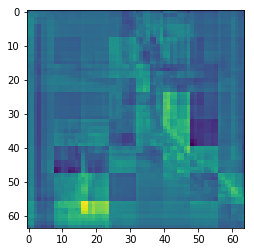

0.0013346876


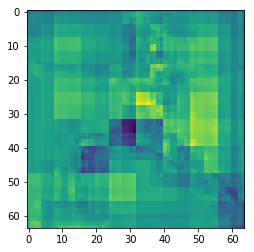

0.00027430675


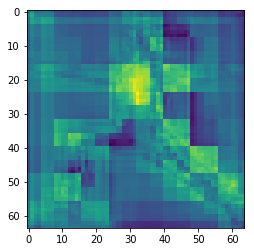

-0.0024535458


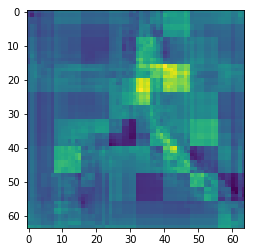

-0.00080025883


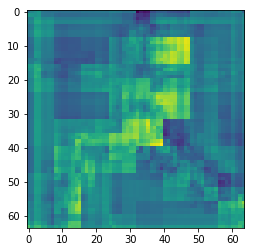

0.00030682673


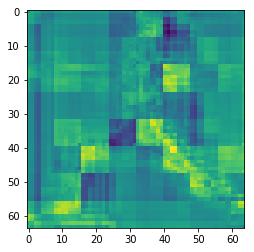

-9.799781e-05


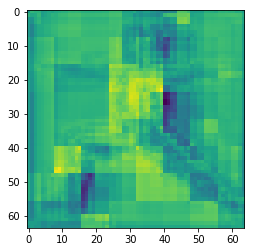

0.0030090637


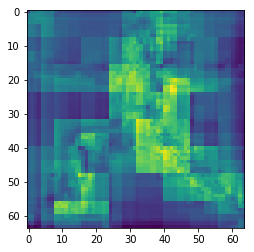

0.0029224055


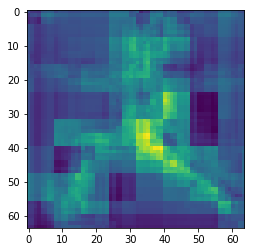

-0.00071756926


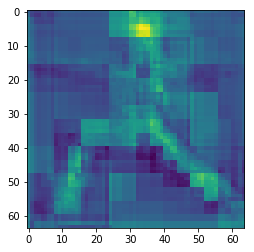

0.0024273298


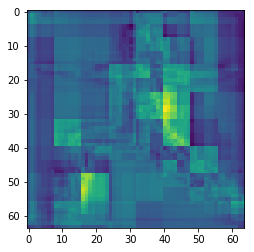

0.003956613


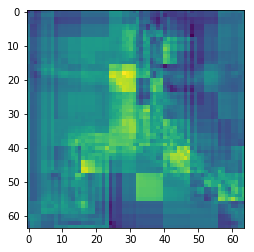

-8.654958e-05


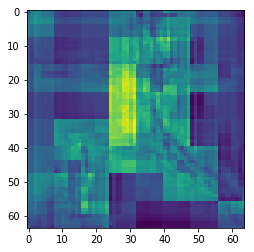

0.0034772258


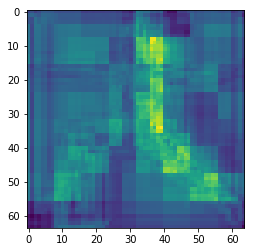

0.001124596


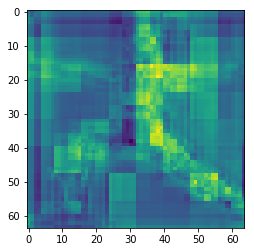

0.0030751645


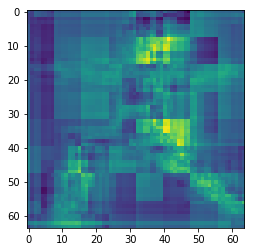

[(164.6875, 552.1875, 0.025070561), (339.0625, 261.5625, 0.013257633), (310.0, 232.5, 0.017769834), (319.6875, 222.8125, 0.018552016), (445.625, 87.1875, 0.01209825), (406.875, 387.5, 0.012102491), (87.1875, 445.625, 0.010647088), (406.875, 222.8125, 0.016557615), (339.0625, 348.75, 0.028582858), (319.6875, 48.4375, 0.029368611), (387.5, 280.9375, 0.018518317), (271.25, 174.375, 0.018991482), (300.3125, 319.6875, 0.018309884), (368.125, 329.375, 0.022593271), (368.125, 184.0625, 0.015132998), (397.1875, 329.375, 0.017782906)]


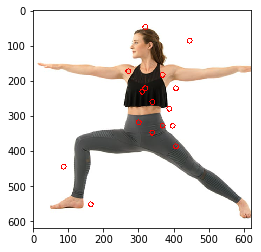

sample.jpg
213.44889960562415
60.10317170430969
(1440, 1080, 3)
0.0019755329


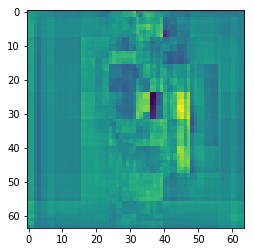

0.001908305


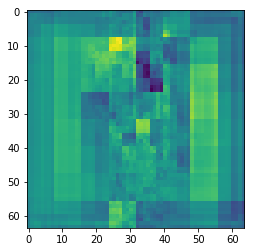

0.00010661315


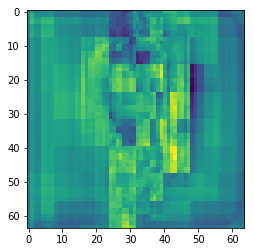

-0.0013457736


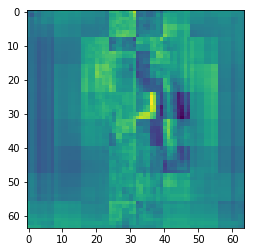

-0.00045713934


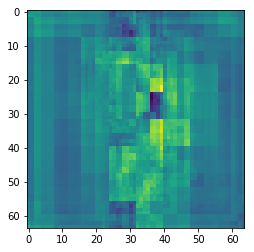

0.00013718416


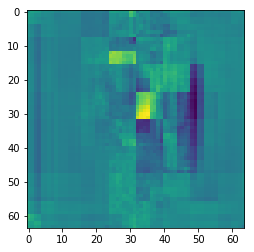

-0.00035602844


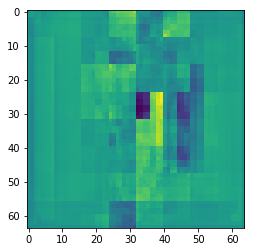

0.0016120314


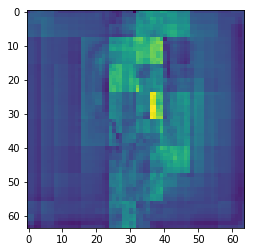

0.00029630188


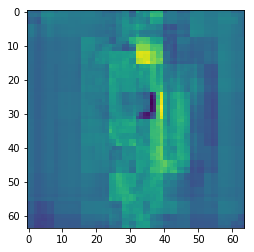

0.00075176446


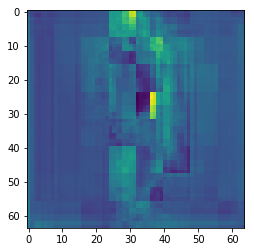

0.0025904733


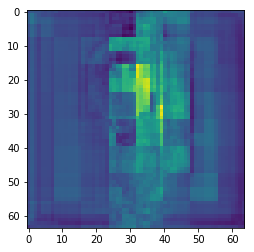

0.0018352128


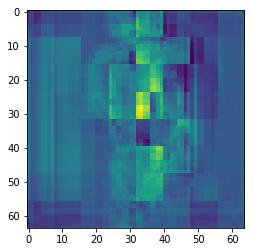

-0.0013925817


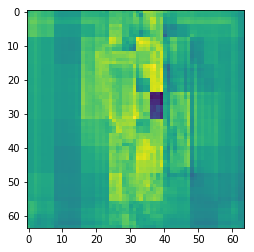

0.0016783583


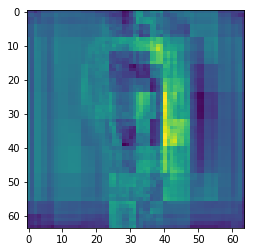

0.0023445077


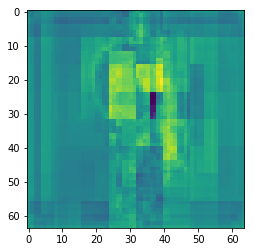

0.0021061888


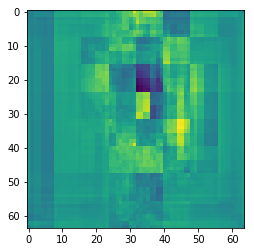

[(759.375, 652.5, 0.018942492), (438.75, 202.5, 0.015212326), (725.625, 922.5, 0.012076956), (607.5, 607.5, 0.014943689), (658.125, 495.0, 0.014804422), (573.75, 675.0, 0.022061745), (658.125, 585.0, 0.016823191), (624.375, 652.5, 0.02807357), (556.875, 292.5, 0.029449707), (624.375, 562.5, 0.03554666), (573.75, 472.5, 0.024219269), (556.875, 630.0, 0.021534255), (624.375, 360.0, 0.013053095), (675.0, 810.0, 0.019609682), (658.125, 472.5, 0.02325099), (759.375, 765.0, 0.017967075)]


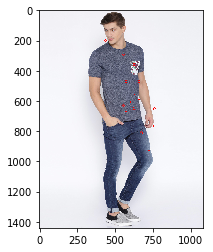

In [10]:
img_dir="../../data/test_images"

for file in os.listdir(img_dir):
    print(file)
    img_file=os.path.join(img_dir,file)
    image_data=imageio.imread(img_file)
    out,scale = inference_file(img_file,xnet)

    kps = post_process_heatmap(out[0,:,:,:])
    #first element of batch
    out=out[0]
    print(np.mean(image_data))
    print(np.std(image_data))
    print(np.shape(image_data))
    for j in range(out.shape[-1]):
        print(np.mean(out[:,:,j]))
        plt.imshow(out[:,:,j])
        plt.show()
    mkps = list() 
    for i, _kp in enumerate(kps):
        _conf = _kp[2]
        mkps.append((_kp[0]*scale[1]*4, _kp[1]*scale[0]*4, _conf))
    print(mkps)
    #normally conf th is around 0.2 but currently no joints are found
    cvmat = render_joints(imageio.imread(img_file), mkps, conf_th=0.002)
    plt.imshow(cvmat)
    plt.show()
